# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

Hint: If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function.

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

--2019-09-20 15:43:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘crx.data’

crx.data            100%[===================>]  31.46K  --.-KB/s    in 0.03s   

2019-09-20 15:43:06 (998 KB/s) - ‘crx.data’ saved [32218/32218]



In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('crx.data', 
                 header=None,
                 names=[
                        'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
                        'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'
                 ])
print(df.shape)
df.head(100)

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


The number of instances match the number of rows. It also matches the number of columns that equals to 15 + the class attribute. The documentation provided for this dataset was kind enough to also tell us the number of null values. I will proceed to verify that it is correct.

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

In [130]:
df.isnull().sum()
#It appears I will have to use '?' as a null parameter. Since the null values
#only represent 5% of the data I will also proceed to not account for them
#in my calculations and mention this in my final conclusion.

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [0]:
df = df.replace({'?':np.NaN})

In [132]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

This information matches up to the expected results now. Only A2 and A14 are continious data. I will make a note of what effect this amount of nulls might have in my findings.

In [136]:
df.dtypes
#A2 and A14 need to be seen as float and INT in that order.

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float32
A12     object
A13     object
A14    float64
A15    float32
A16     object
dtype: object

In [0]:
df['A2'] = pd.to_numeric(df.A2)
df['A14'] = pd.to_numeric(df.A14)
df['A11'] = pd.to_numeric(df.A11, downcast='float')
df['A15'] = pd.to_numeric(df.A15, downcast='float')

In [135]:
df.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0.0,f,s,120.0,0.0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0.0,t,g,360.0,0.0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0.0,t,g,164.0,31285.0,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0.0,f,g,80.0,1349.0,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0.0,f,g,180.0,314.0,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0.0,t,g,52.0,1442.0,+


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

### My notes

Here I will birng in a few of the functions I've worked with in past assignments and modify them to meet my needs here.

In [0]:
import scipy.stats as stats
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data, nan_policy='omit')
  #stderr = np.std(data, ddof=1) / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  #print(margin_of_error)
  return (mean, mean - margin_of_error, mean + margin_of_error)
def confidence_interval_for_column(positive_data, negative_data, column, confidence=.95):
  """
  This function will return confidence intervals, and a plot of the data provided
  along with the confindence intervals for the data.

  The purpose of this function is to look at the difference between the two data
  ploted in one graph.

  Confidence interval is 95% default. Use float here to change this interval. 
  Interval should be less than 1.

  """
  
  print('This interval is for positive')
  answer1 = confidence_interval(positive_data[column], confidence)
  print(answer1)
  print('This interval is for negative')
  answer2 = confidence_interval(negative_data[column], confidence)
  print(answer2)
  print('\nThe blue line represents positive in this graph\n The orange line negative')
  ax = sns.kdeplot(positive_data[column], legend=False)
  CI = confidence_interval(positive_data[column])
  plt.axvline(x=CI[1], color='#609EC9')
  plt.axvline(x=CI[2], color='#609EC9')
  c = plt.axvline(x=CI[0], color='k');
    
  ax2 = sns.kdeplot(negative_data[column], legend =False)
  CI2 = confidence_interval(negative_data[column])
  plt.axvline(x=CI2[1], color='#FF871E')
  plt.axvline(x=CI2[2], color='#FF871E')
  d = plt.axvline(x=CI2[0], color='k');
  plt.show();

  return plt.show()

In [0]:
#I decided to handle my Nan differently because It was interfering with my 
#answers

positive = df[df['A16'] == '+']
negative = df[df['A16'] == '-']

positive = positive[continuos].replace({np.NaN:0})
negative = negative[continuos].replace({np.NaN:0})

In [139]:
positive.head()

,A2,A3,A8,A14
0,30.83,0.000,1.25,202.0
1,58.67,4.460,3.04,43.0
2,24.50,0.500,1.50,280.0
3,27.83,1.540,3.75,100.0
4,20.17,5.625,1.71,120.0


In [140]:
negative.head()

,A2,A3,A8,A14
70,32.33,7.5,1.585,420.0
71,34.83,4.0,12.500,0.0
72,38.58,5.0,13.500,980.0
73,44.25,0.5,10.750,400.0
74,44.83,7.0,1.625,160.0


In [141]:
#I want to make a condition to just select continuos and categorical
continuos_condition = df.dtypes == 'float64'
categorical_condition = df.dtypes == 'object'
continuos_condition
#decided to not keep trying this because of time constraint

A1     False
A2      True
A3      True
A4     False
A5     False
A6     False
A7     False
A8      True
A9     False
A10    False
A11    False
A12    False
A13    False
A14     True
A15    False
A16    False
dtype: bool

In [142]:
# this variable allows me to filter continuos from categorical for ease of use.
continuos = ['A2', 'A3', 'A8', 'A14']
categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15']
print(df[categorical].head())
df[continuos].head()

  A1 A4 A5 A6 A7 A9 A10  A11 A12 A13    A15
0  b  u  g  w  v  t   t  1.0   f   g    0.0
1  a  u  g  q  h  t   t  6.0   f   g  560.0
2  a  u  g  q  h  t   f  0.0   f   g  824.0
3  b  u  g  w  v  t   t  5.0   t   g    3.0
4  b  u  g  w  v  t   f  0.0   f   s    0.0


,A2,A3,A8,A14
0,30.83,0.000,1.25,202.0
1,58.67,4.460,3.04,43.0
2,24.50,0.500,1.50,280.0
3,27.83,1.540,3.75,100.0
4,20.17,5.625,1.71,120.0


This interval is for positive
(33.500814332247565, 32.03482072051091, 34.96680794398422)
This interval is for negative
(29.029947780678853, 27.846462988013414, 30.213432573344292)

The blue line represents positive in this graph
 The orange line negative


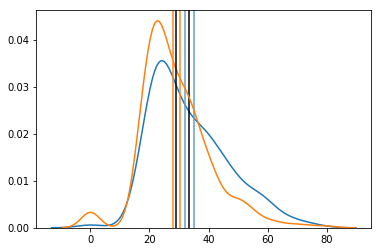

This interval is for positive
(5.9049511400651475, 5.290474713739196, 6.519427566391099)
This interval is for negative
(3.839947780678851, 3.4041524516216173, 4.2757431097360845)

The blue line represents positive in this graph
 The orange line negative


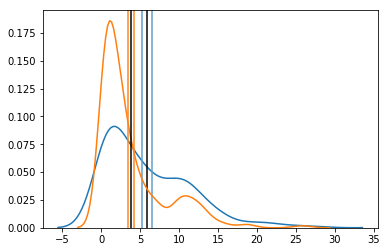

This interval is for positive
(3.427899022801302, 2.9651124713225334, 3.890685574280071)
This interval is for negative
(1.2579242819843344, 1.04488426761699, 1.4709642963516787)

The blue line represents positive in this graph
 The orange line negative


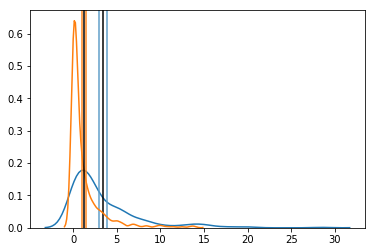

This interval is for positive
(161.2084690553746, 143.03848501815162, 179.37845309259757)
This interval is for negative
(196.04960835509138, 177.77685817054675, 214.322358539636)

The blue line represents positive in this graph
 The orange line negative


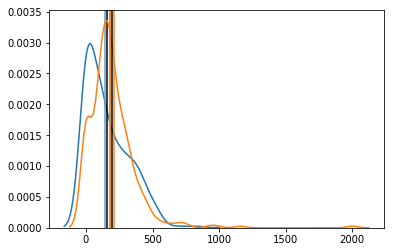

In [143]:
# Here I graphed all the continuos data with the function I made earlier
for i in range(df[continuos].shape[1]):
  confidence_interval_for_column(positive, negative, continuos[i], confidence=.95)

I will run Ttest on A14 and A8 as I see they might give me the most significant p value.

In [157]:
stats.ttest_ind(positive['A14'], negative['A14'], nan_policy='omit')

Ttest_indResult(statistic=-2.6254915751389047, pvalue=0.008844680277712815)

In [145]:
stats.ttest_ind(positive['A8'], negative['A8'], nan_policy='omit')

Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)

In [153]:
contingency_table_a6 = pd.crosstab(
    df["A16"],
    df['A6'],
    margins = True)

contingency_table_a6

A6,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x,All
A16,,,,,,,,,,,,,,,
+,19,62,29,7,14,7,14,3,14,16,51,2,33,32,303
-,35,75,12,23,11,46,45,7,37,22,27,1,31,6,378
All,54,137,41,30,25,53,59,10,51,38,78,3,64,38,681


In [154]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table_a6)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 98.32520342679135
P-value: 9.446933633611132e-10
Degrees of Freedom: 28
Expected: 
 [[ 24.02643172  60.95594714  18.24229075  13.34801762  11.12334802
   23.5814978   26.25110132   4.44933921  22.69162996  16.90748899
   34.70484581   1.33480176  28.47577093  16.90748899 303.        ]
 [ 29.97356828  76.04405286  22.75770925  16.65198238  13.87665198
   29.4185022   32.74889868   5.55066079  28.30837004  21.09251101
   43.29515419   1.66519824  35.52422907  21.09251101 378.        ]
 [ 54.         137.          41.          30.          25.
   53.          59.          10.          51.          38.
   78.           3.          64.          38.         681.        ]]


In [152]:
contingency_table_a7 = pd.crosstab(
    df["A16"],
    df['A7'],
    margins = True)

contingency_table_a7

A7,bb,dd,ff,h,j,n,o,v,z,All
A16,,,,,,,,,,
+,25,2,8,87,3,2,1,169,6,303
-,34,4,49,51,5,2,1,230,2,378
All,59,6,57,138,8,4,2,399,8,681


In [155]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table_a7)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 45.03420714024056
P-value: 0.0004097261730223732
Degrees of Freedom: 18
Expected: 
 [[ 26.25110132   2.66960352  25.36123348  61.40088106   3.55947137
    1.77973568   0.88986784 177.52863436   3.55947137 303.        ]
 [ 32.74889868   3.33039648  31.63876652  76.59911894   4.44052863
    2.22026432   1.11013216 221.47136564   4.44052863 378.        ]
 [ 59.           6.          57.         138.           8.
    4.           2.         399.           8.         681.        ]]


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?**


A14 with a less significant p value
Ttest_indResult(statistic=-2.6254915751389047, pvalue=0.008844680277712815)

A8 with a lot more significant p value
Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)


---

## Two Sample T-test

1) Null Hypothesis (boring hypothesis) default state

No difference between positive and negative when tested with column A14.

$\bar{x}_1 = \bar{x}_2$

2) Alternative Hypothesis (interesting hypothesis)

The mean of A14 is different between positive and negative.

$\bar{x}_1 \neq \bar{x}_2$

3) Confidence Level (The probability of seeing a true result in spite of random variability)

95% or .05

**A14 with a less significant p value** Ttest_indResult(statistic=-2.6254915751389047, pvalue=0.008844680277712815)

4) t-statistic: -2.6255

5) p-value: .00884

Conclusion:

Due to our test resulting in a t-statistic of -2.6255 and having a p-vlaue of .00884, we reject the null hypothesis that A14 get into positive and negative at a similar rate, and suggest that A14 does have an effect on the rate of positive and negative.

---

---

## Two Sample T-test

1) Null Hypothesis (boring hypothesis) default state

No difference between positive and negative when tested with column A14.

$\bar{x}_1 = \bar{x}_2$

2) Alternative Hypothesis (interesting hypothesis)

The mean of A8 is different between positive and negative.

$\bar{x}_1 \neq \bar{x}_2$

3) Confidence Level (The probability of seeing a true result in spite of random variability)

95% or .05

**A8 with a lot more significant p value** Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)

4) t-statistic: 8.93

5) p-value: 3.67105 e-18

Conclusion:

Due to our test resulting in a t-statistic of 8.93 and having a p-vlaue of 3.67105 e-18, we have strong evidence to support rejecting the null hypothesis that A8 get into positive and negative at a similar rate, and suggest that A8 does have an effect on the rate of positive and negative.

---

###Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?

---

## Chi square test

1) Null Hypothesis (boring hypothesis) default state

No difference between positive and negative when tested with column A7.

$\bar{x}_1 = \bar{x}_2$

2) Alternative Hypothesis (interesting hypothesis)

The positive and negative rate is affected by A7.

$\bar{x}_1 \neq \bar{x}_2$

3) Confidence Level (The probability of seeing a true result in spite of random variability)

95% or .05

**A6 with a less significant p value** Chi-Squared: 45.03420714024056
P-value: 0.0004097261730223732
Degrees of Freedom: 18

4) chi squared-statistic: 45.0342

5) p-value: 0.0004

Conclusion:

Due to our test resulting in a t-statistic of 45.0342 and having a p-vlaue of 0.0004, we reject the null hypothesis that A7 get into positive and negative at a similar rate, and suggest that A7 does have an effect on the rate of positive and negative.

---

---

## Chi square test

1) Null Hypothesis (boring hypothesis) default state

No difference between positive and negative when tested with column A6.

$\bar{x}_1 = \bar{x}_2$

2) Alternative Hypothesis (interesting hypothesis)

The positive and negative rate is affected by A6.

$\bar{x}_1 \neq \bar{x}_2$

3) Confidence Level (The probability of seeing a true result in spite of random variability)

95% or .05

**A6 with a more significant p value** Chi-Squared: 98.32520342679135
P-value: 9.446933633611132e-10

4) chi squared-statistic: 98.33

5) p-value: 9.4469 e-10

Conclusion:

Due to our test resulting in a t-statistic of 98.33 and having a p-vlaue of 9.4469 e-10, we reject the null hypothesis that A6 get into positive and negative at a similar rate, and suggest that A6 does have an effect on the rate of positive and negative.

---

###What was the most challenging part of this sprint challenge?

I did not have much challenge with this sprint. I did however spend some time implementing some for loops that took some time to iterate. But other than that I understood this weeks content pretty well.

## Stretch Goals

Please do not work on anything listed in this section until you have adequately answered everything in the above three sections, all of these stretch goals are **OPTIONAL** but completing them will ensure you a score of 3 on the corresponding sections.

### Section 1 Stretch Goal: (do the following)
- Go above and beyond in conducting thorough data exploration including high quality comments and/or markdown text cells to explain your process/discoveries.

### Section 2 Stretch Goals: (do one of the following)
 - Write a function(s) to automate the execution of t-tests on the continuous variables treating the different class labels as the two samples.

 - Write a funciton(s) to automate the execution of chi^2 tests on all of the different combinations of categorical variables in the dataset.

### Section 3 Stretch Goals: (do one of the following)
- Construct a confidence interval around the mean of one of the continuous variables, communicate the results/interpretation of that confidence interval in the most consumable/easy-to-understand way that you can. (You may choose to include a graph here, but you don't necessarily have to) Communicate the precision of your estimate as clearly as possible.

- Explain the relationship between confidence intervals and T-tests, if possible, use code to demonstrate some important aspects of te